In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.


In [49]:
# Import our libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression





In [23]:
# Read our data into a dataframe
df = pd.read_csv('datasets/data.csv')
df.shape

(6819, 96)

In [5]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Feature Importance

Each feature in a dataset has differing levels of importance. Information Gain (IG) can be used to determine the importance of features in a dataset. 

$$
IG_{Sex} = 0.469 - (0.303\times467/712 - 0.386\times245/712) = 0.403 \\
$$

Since pclass is used twice and age is used twice, we take the weighted average of the IGs:

$$
IG_{pclass[1]} = 0.386 - (0.074\times130/245 - 0.5\times115/245) = 0.581 \\
IG_{pclass[2]} = 0.271 - (0.442\times91/445 - 0.209\times354/445) = 0.347 \\
IG_{pclass} = 0.581 \times 245/712 + 0.347 \times 445/712 = 0.417
$$

Same calculation for age:

$$
IG_{age[1]} = 0.303 - (0.434\times22/467 - 0.271\times445/467) = 0.541 \\
IG_{age[2]} = 0.074 - (0.5\times2/130 - 0.061\times128/130) = 0.126 \\
IG_{age} =  0.541 \times 467/712 +  0.126 \times 130/712 = 0.378
$$

Then we normalize by taking:

$$
IG_{Sex} = \frac{IG_{Sex}}{IG_{Sex}+IG_{pclass}+IG_{age}} \\

IG_{Sex} = 0.336 \\
IG_{pclass} = 0.348 \\
IG_{age} = 0.315 \\
$$

The value generated is the **importance** of each feature. Now let's find the optimal depth of the tree and the important features using sklearn.

In [ ]:
# let's reuse the dataframe from previously
df.head()
## ROA: return on assets
## Realized margin is the actual gross profit margin you realize at the end from the product, after exposing it to different discounts and markdowns.
## The quick ratio, also called an acid-test ratio, measures a company's short-term liquidity against its short-term obligations

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [7]:
# rename 'Bankrupt?' to 'Bankrupt'
df.rename(columns={'Bankrupt?': 'Bankrupt'},inplace=True, errors='raise')

Depth = 1, train_acc = 0.9656, eval_acc = 0.9707
Depth = 2, train_acc = 0.9688, eval_acc = 0.9697
Depth = 3, train_acc = 0.9717, eval_acc = 0.9629
Depth = 4, train_acc = 0.9738, eval_acc = 0.9658
Depth = 5, train_acc = 0.9797, eval_acc = 0.9589
Depth = 6, train_acc = 0.9845, eval_acc = 0.9580
Depth = 7, train_acc = 0.9883, eval_acc = 0.9482
Depth = 8, train_acc = 0.9910, eval_acc = 0.9511


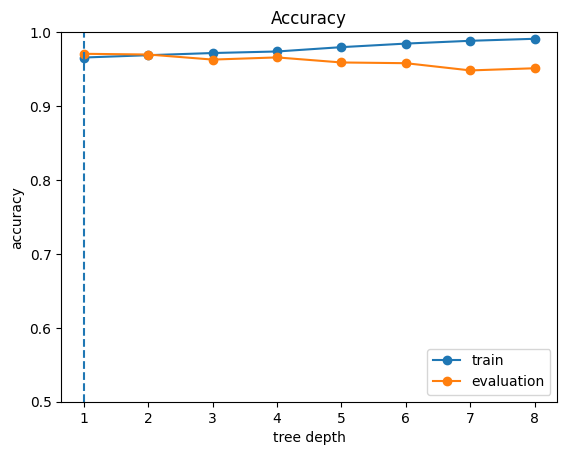

In [ ]:
# Separate the Titanic data into features and target class.
y = df['Bankrupt']
x = df.drop('Bankrupt', axis=1)

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 1, test_acc = 0.9756


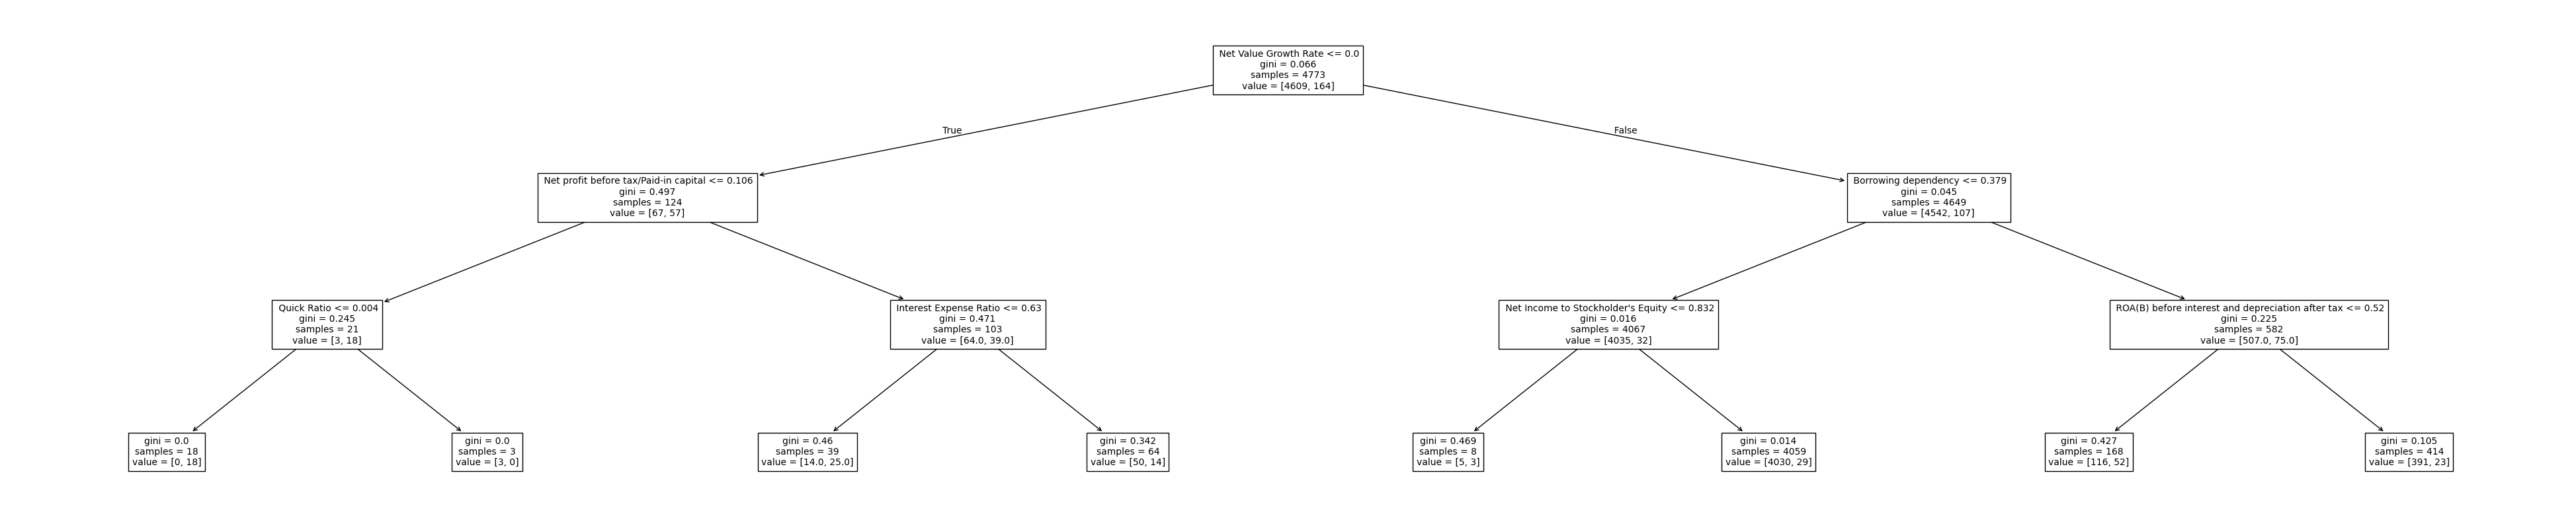

feature importance = [0.    0.    0.154 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.459 0.    0.    0.    0.051 0.086 0.
 0.    0.    0.    0.149 0.    0.    0.08  0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.022 0.    0.    0.    0.    0.   ]


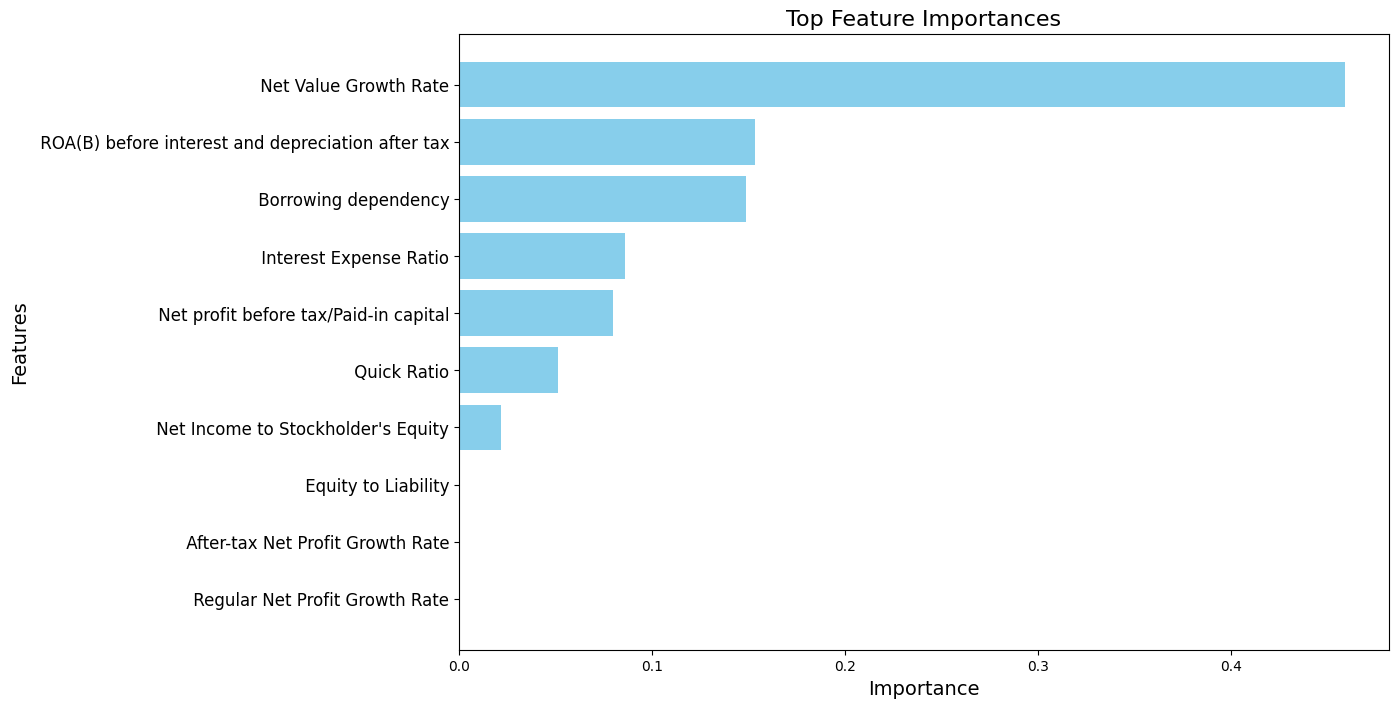

In [13]:
# I set max_step=3 as a constant value for tree visualization.
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(50,10))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features.
feature_importance = model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

print('feature importance = {}'.format(feature_importance.round(3)))
# Analyze the importance of features
feature_importance = model.feature_importances_
n_features = x_train.shape[1]
feat_names = x_train.columns.tolist()

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]  # Sort in descending order
sorted_features = [feat_names[i] for i in sorted_idx]
sorted_importances = feature_importance[sorted_idx]

# Select top features (e.g., top 10)
top_n = 10
sorted_features = sorted_features[:top_n]
sorted_importances = sorted_importances[:top_n]

# Plot the feature importances
plt.figure(figsize=(12, 8))  # Larger figure size
plt.barh(range(len(sorted_features)), sorted_importances, align="center", color="skyblue")
plt.yticks(range(len(sorted_features)), sorted_features, fontsize=12)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Top Feature Importances", fontsize=16)
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


### Based on the chart and calculated feature importance, key features that affect the model are: Net value growth rate, ROA(B) before interest and depreciation after tax, borrowing dependency, interest expense ratio, net profit before tax/paid0in capital, quick ratio and net income to stockholder's equity

# 2 - Random Forest

In [41]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4, stratify=y)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (5455, 95) (5455,)
Test set: (1364, 95) (1364,)


In [42]:
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and test data
x_train= scaler.fit_transform(x)
x_test = scaler.transform(x)


# Split the dataset into training and test data
# test_size = 0.2: 20% of my sample is test data
# stratify = y: try to evenly distribute the values of y in each split
x_train, x_test, y_train, y_test = train_test_split(x_test, y, test_size=0.2, random_state=42, stratify=y)





Confusion Matrix:
[[1312    8]
 [  34   10]]
Accuracy: 0.97
F1 Score: 0.32
AUC: 0.92
OOB Score: 0.97


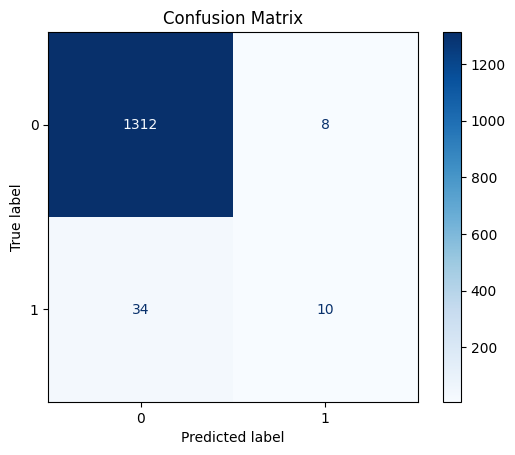

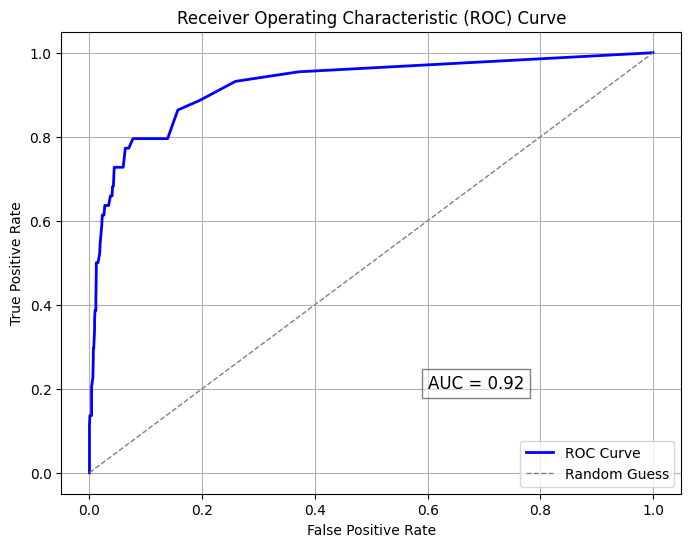

In [48]:

# Step 2: Train a Random Forest model with OOB score enabled
rf_classifier = RandomForestClassifier(random_state=42, oob_score=True)
rf_classifier.fit(x_train, y_train)

# Retrieve the OOB score
oob_score = rf_classifier.oob_score_

# Step 3: Make predictions on the test set
y_pred = rf_classifier.predict(x_test)
y_pred_proba = rf_classifier.predict_proba(x_test)[:, 1]

# Step 4: Evaluate the model

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Display metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")
print(f"OOB Score: {oob_score:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.text(0.6, 0.2, f"AUC = {roc_auc:.2f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

